# Data Management with GeoPandas and GeoPackage

Uncomment the next block if you don't have GeoPandas:

In [ ]:
#!pip install geopandas

In [1]:
import os
import requests
import zipfile
import geopandas

In [2]:
file = "AdminAreasGermany.zip"
url="https://daten.gdz.bkg.bund.de/produkte/vg/vg250_ebenen_0101/aktuell/vg250_01-01.utm32s.shape.ebenen.zip"

if not os.path.isfile(file):
    response = requests.get(url)
    with open(file, mode="wb") as file:
        file.write(response.content)
    print("Download of ", file, "complete.")
else:
    print(file, "was already downloaded.")

Download of  <_io.BufferedWriter name='AdminAreasGermany.zip'> complete.


Unzip:

… on Google Colab:

In [3]:
!unzip AdminAreasGermany.zip

Archive:  AdminAreasGermany.zip
   creating: vg250_01-01.utm32s.shape.ebenen/
 extracting: vg250_01-01.utm32s.shape.ebenen/aktualitaet.txt  
   creating: vg250_01-01.utm32s.shape.ebenen/dokumentation/
  inflating: vg250_01-01.utm32s.shape.ebenen/dokumentation/anlagen_vg.pdf  
  inflating: vg250_01-01.utm32s.shape.ebenen/dokumentation/Datenquellen_vg_nuts.pdf  
  inflating: vg250_01-01.utm32s.shape.ebenen/dokumentation/verwaltungsgliederung_vg.pdf  
 extracting: vg250_01-01.utm32s.shape.ebenen/dokumentation/aktualitaet.txt  
  inflating: vg250_01-01.utm32s.shape.ebenen/dokumentation/annex_vg.pdf  
  inflating: vg250_01-01.utm32s.shape.ebenen/dokumentation/vg250.pdf  
  inflating: vg250_01-01.utm32s.shape.ebenen/dokumentation/vg250_eng.pdf  
   creating: vg250_01-01.utm32s.shape.ebenen/vg250_ebenen_0101/
 extracting: vg250_01-01.utm32s.shape.ebenen/vg250_ebenen_0101/VG250_GEM.cpg  
  inflating: vg250_01-01.utm32s.shape.ebenen/vg250_ebenen_0101/VG250_GEM.dbf  
  inflating: vg250_01-01.utm

… else:

In [ ]:
with zipfile.ZipFile(file,"r") as zip_ref:
    zip_ref.extractall()

Let's load two of the shapefiles with GeoPandas:

In [6]:
kreise = geopandas.read_file("vg250_01-01.utm32s.shape.ebenen/vg250_ebenen_0101/VG250_KRS.shp")

<Axes: >

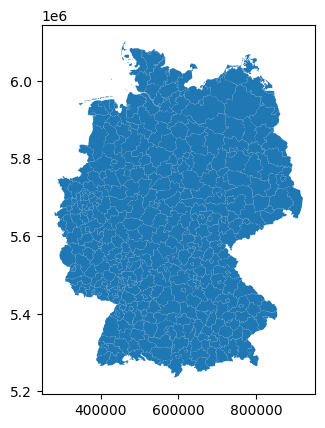

In [7]:
kreise.plot()

<Axes: >

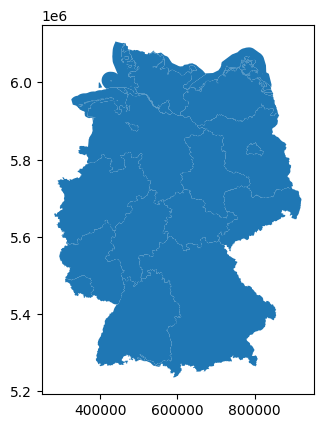

In [8]:
laender = geopandas.read_file("vg250_01-01.utm32s.shape.ebenen/vg250_ebenen_0101/VG250_LAN.shp")
laender.plot()

In [11]:
kreise.to_file("package.gpkg", layer='kreise', driver="GPKG")
laender.to_file("package.gpkg", layer='laender', driver="GPKG")